In [117]:
%load_ext autoreload
%autoreload 2

import graphviz
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import tree


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the pi and ecological data

In [8]:
pi_df = pd.read_csv("gemsnake_gen.csv")
# Drop the last 2 empty columns from the eco_df
eco_df = pd.read_csv("gemsnake_eco.csv").iloc[:, :20]
print(pi_df.shape, eco_df.shape)
display(pi_df)
display(eco_df)

(33, 6) (33, 20)


,pop_id,n,pi_mean,pi_std,td_mean,td_std
0,Compsophis_pop1,11,0.00092,0.00109,0.258,1.021
1,Compsophis_pop2,5,0.00119,0.00115,0.246,0.976
2,Compsophis_pop3,7,0.00110,0.00121,0.696,0.940
3,Compsophis_pop4,3,0.00231,0.00200,0.493,0.907
4,Dromicodryas_pop1,15,0.00069,0.00089,0.155,1.027
5,Dromicodryas_pop2,14,0.00078,0.00090,-0.172,1.206
6,Dromicodryas_pop3,5,0.00097,0.00086,0.112,0.933
7,Langaha_pop1,4,0.00108,0.00094,0.251,0.879
8,Langaha_pop2,4,0.00159,0.00143,0.331,0.961
9,Leioheterodon_pop1,15,0.00058,0.00072,0.314,1.028


,pop,demographic_hist,evergreen_rainforest,central_highlands,dry_deciduous_forest,arid_spiny_bush,humid_arid_both,GDM_1,GDM_2,GDM_3,GDM_4,single_multiple,elevation_range,elevation_class,alt_mean,alt_var,alt_stat_range,alt_index,genus_demog,species_demog
0,Compsophis_pop1,exp,yes,yes,no,no,humid,yes,yes,no,no,multiple,824-1648,high,1181,61635,824,52,unshared,unshared
1,Compsophis_pop2,exp,yes,yes,no,no,humid,yes,no,no,no,single,553-946,mid,710,24956,294,35,unshared,unshared
2,Compsophis_pop3,bott,yes,yes,no,no,humid,yes,yes,yes,no,multiple,74-1043,broad,579,99771,969,172,unshared,unshared
3,Compsophis_pop4,bott,yes,yes,no,no,humid,yes,yes,no,no,multiple,180-1173,broad,749,262281,993,350,unshared,NaN
4,Dromicodryas_pop1,exp,yes,yes,yes,yes,both,yes,yes,no,yes,multiple,2-1266,broad,523,251517,1264,481,unshared,unshared
5,Dromicodryas_pop2,exp,yes,no,yes,no,both,yes,yes,yes,yes,multiple,6-631,low,82,15698,298,191,unshared,unshared
6,Dromicodryas_pop3,exp,no,yes,yes,no,both,no,no,yes,no,single,7-305,low,202,41761,625,206,unshared,NaN
7,Langaha_pop1,exp,yes,yes,no,no,humid,yes,no,no,no,single,69-1275,broad,659,330962,1206,502,unshared,shared
8,Langaha_pop2,bott,yes,no,yes,yes,both,yes,no,yes,yes,multiple,2-204,low,87,7244,202,84,unshared,shared
9,Leioheterodon_pop1,bott,yes,yes,yes,yes,both,yes,no,yes,yes,multiple,6-1448,broad,212,140717,1442,665,unshared,NaN


## Preprocess the ecological data

In [73]:

## Columns w/ categorical variables to onehot encode
onehot_columns = ["demographic_hist", "humid_arid_both"]#, "elevation_class"]
transformed_eco_df = OneHotEncoder(sparse_output=False).set_output(transform="pandas")\
                        .fit_transform(eco_df[onehot_columns]).astype(int)

## Convert all yes/no columns to binary
yesno_columns = ["evergreen_rainforest", "central_highlands", "dry_deciduous_forest", "arid_spiny_bush",
                "GDM_1", "GDM_2", "GDM_3", "GDM_4"]
for c in yesno_columns:
    transformed_eco_df[c] = (eco_df[c] == "yes").astype(int)

## Altitude columns
all_alt_columns = ["alt_mean", "alt_var", "alt_stat_range", "alt_index"]
sub_alt_columns = ["alt_mean", "alt_index"]
alt_columns = all_alt_columns
for c in alt_columns:
    transformed_eco_df[c] = eco_df[c]

transformed_eco_df

,demographic_hist_bott,demographic_hist_exp,humid_arid_both_both,humid_arid_both_humid,evergreen_rainforest,central_highlands,dry_deciduous_forest,arid_spiny_bush,GDM_1,GDM_2,GDM_3,GDM_4,alt_mean,alt_var,alt_stat_range,alt_index
0,0,1,0,1,1,1,0,0,1,1,0,0,1181,61635,824,52
1,0,1,0,1,1,1,0,0,1,0,0,0,710,24956,294,35
2,1,0,0,1,1,1,0,0,1,1,1,0,579,99771,969,172
3,1,0,0,1,1,1,0,0,1,1,0,0,749,262281,993,350
4,0,1,1,0,1,1,1,1,1,1,0,1,523,251517,1264,481
5,0,1,1,0,1,0,1,0,1,1,1,1,82,15698,298,191
6,0,1,1,0,0,1,1,0,0,0,1,0,202,41761,625,206
7,0,1,0,1,1,1,0,0,1,0,0,0,659,330962,1206,502
8,1,0,1,0,1,0,1,1,1,0,1,1,87,7244,202,84
9,1,0,1,0,1,1,1,1,1,0,1,1,212,140717,1442,665


In [161]:
keep = ["evergreen_rainforest", "central_highlands", "dry_deciduous_forest", "arid_spiny_bush"]
keep = ["humid_arid_both_both", "alt_mean", "alt_index"]
#X = transformed_eco_df.iloc[:, 1:3]
X = transformed_eco_df[keep]

#X = transformed_eco_df
y = pi_df["pi_mean"]

regressor = DecisionTreeRegressor(max_depth=2, criterion="friedman_mse")
print(cross_val_score(regressor, X, y, cv=10))

_ = regressor.fit(X, y)
#_ = plot_tree(regressor, precision=4)

[  -0.85988581   -4.56522765    0.67172749   -2.62716723   -0.28785536
   -0.81702737  -16.93358676   -1.64938121   -3.5641229  -148.55212551]


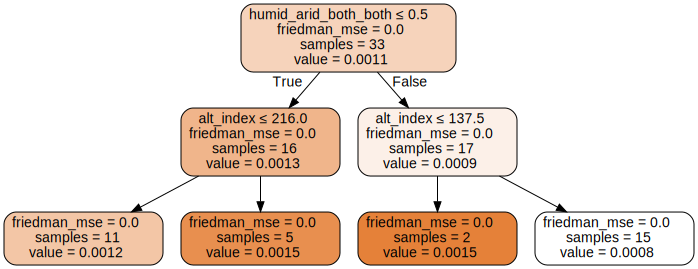

In [164]:
dot_data = tree.export_graphviz(regressor, out_file=None, 
                      feature_names=X.columns,  
                      class_names=["pi_mean"],  
                      filled=True, rounded=True,  
                      special_characters=True,
                      precision=4)  

graph = graphviz.Source(dot_data)  
graph

## Classifier

[0.71428571 0.42857143 0.42857143 0.66666667 0.5       ]


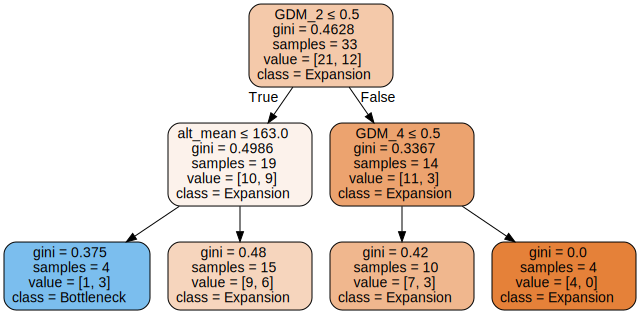

In [157]:
keep = ["evergreen_rainforest", "central_highlands", "dry_deciduous_forest", "arid_spiny_bush"]
keep = ["humid_arid_both_both", "alt_mean", "alt_index"]
keep = ["GDM_1", "GDM_2", "GDM_3", "GDM_4", "alt_mean"]
X = transformed_eco_df.iloc[:, 1:3]
X = transformed_eco_df[keep]

#X = transformed_eco_df.iloc[:, 2:]
y = transformed_eco_df["demographic_hist_bott"]

classifier = DecisionTreeClassifier(max_depth=2, min_samples_leaf=3)
print(cross_val_score(classifier, X, y, cv=5))

_ = classifier.fit(X, y)
#_ = plot_tree(regressor, precision=4)
dot_data = tree.export_graphviz(classifier, out_file=None, 
                      feature_names=X.columns,  
                      class_names=["Expansion", "Bottleneck"],  
                      filled=True, rounded=True,  
                      special_characters=True,
                      precision=4)  

graph = graphviz.Source(dot_data)  
graph 
